# 🧠 Deep Learning Practical Assignment (Adult Income Dataset)

## 📌 Dataset
We will use the **Adult Income dataset** (also known as the Census Income dataset).  
The task is to predict whether a person earns **more than $50K/year** based on demographic and employment attributes.

---


In [ ]:
%pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# Option 1: Using OpenML via scikit-learn
from sklearn.datasets import fetch_openml
import pandas as pd

# Load dataset from OpenML
adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame

print(df.head())
print(df.shape)  # (48842, 15)



   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country  class  
0       

## Part 0: Data Preparation
1. Load the dataset into a DataFrame.
2. Split the data into **training, validation, and test sets**.  
   - Suggested: 70% training, 15% validation, 15% test.
3. Apply any necessary preprocessing:
   - Handle categorical features (encoding).
   - Scale numerical features if needed.
4. After training your models, always report results on:
   - **Training accuracy**
   - **Validation accuracy**
   - **Test accuracy**
5. At the end of the assignment, **compare all methods** across train, validation, and test sets.


In [ ]:
df.duplicated().sum()

np.int64(52)

- since not too much duplicates, drop

In [ ]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48790 non-null  int64   
 1   workclass       45995 non-null  category
 2   fnlwgt          48790 non-null  int64   
 3   education       48790 non-null  category
 4   education-num   48790 non-null  int64   
 5   marital-status  48790 non-null  category
 6   occupation      45985 non-null  category
 7   relationship    48790 non-null  category
 8   race            48790 non-null  category
 9   sex             48790 non-null  category
 10  capital-gain    48790 non-null  int64   
 11  capital-loss    48790 non-null  int64   
 12  hours-per-week  48790 non-null  int64   
 13  native-country  47934 non-null  category
 14  class           48790 non-null  category
dtypes: category(9), int64(6)
memory usage: 3.0 MB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

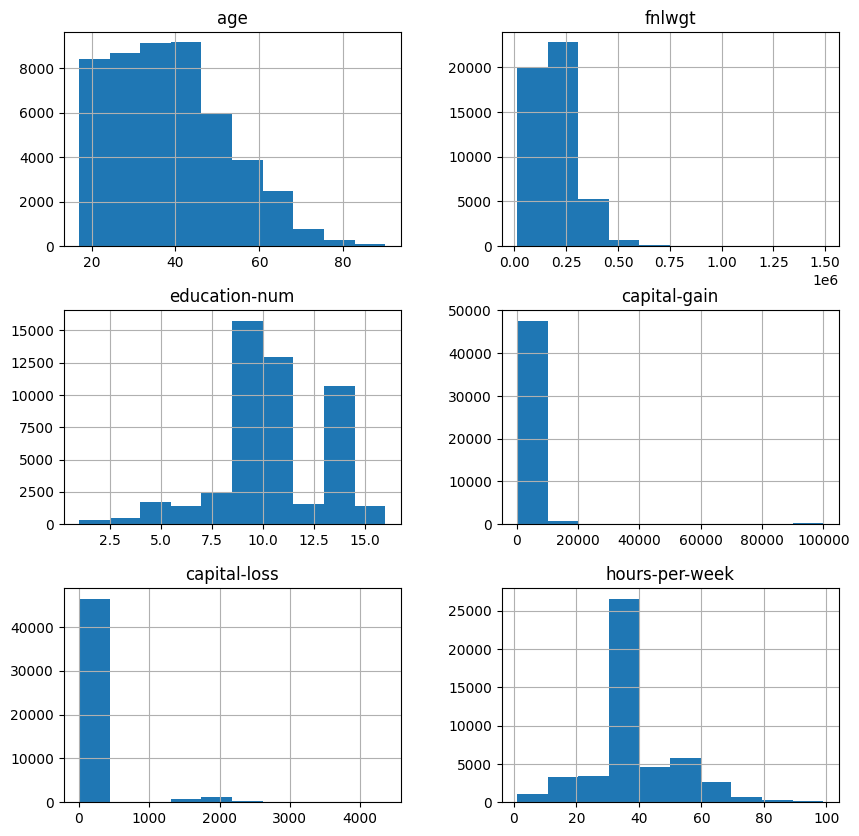

In [ ]:
df.select_dtypes(include=['int64']).hist(figsize=(10, 10))

In [ ]:
df=df.drop(columns=['capital-gain','capital-loss'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48790 non-null  int64   
 1   workclass       45995 non-null  category
 2   fnlwgt          48790 non-null  int64   
 3   education       48790 non-null  category
 4   education-num   48790 non-null  int64   
 5   marital-status  48790 non-null  category
 6   occupation      45985 non-null  category
 7   relationship    48790 non-null  category
 8   race            48790 non-null  category
 9   sex             48790 non-null  category
 10  hours-per-week  48790 non-null  int64   
 11  native-country  47934 non-null  category
 12  class           48790 non-null  category
dtypes: category(9), int64(4)
memory usage: 2.3 MB


<Axes: xlabel='class', ylabel='count'>

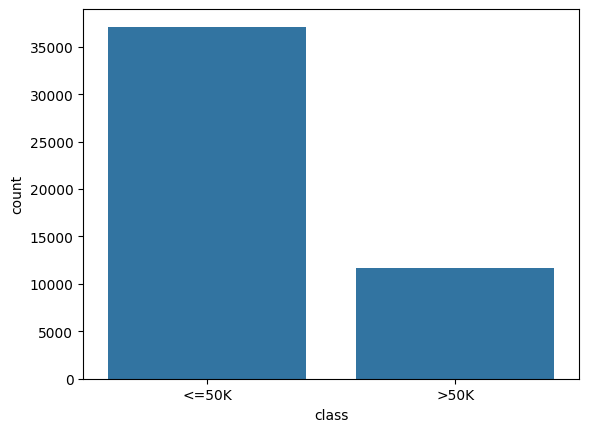

In [ ]:
sns.countplot(data=df,x='class')

- target is not balanced

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df["class"])

In [ ]:
df[df.select_dtypes(include='category').columns]= df.select_dtypes(include='category').astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48790 non-null  int64 
 1   workclass       48790 non-null  object
 2   fnlwgt          48790 non-null  int64 
 3   education       48790 non-null  object
 4   education-num   48790 non-null  int64 
 5   marital-status  48790 non-null  object
 6   occupation      48790 non-null  object
 7   relationship    48790 non-null  object
 8   race            48790 non-null  object
 9   sex             48790 non-null  object
 10  hours-per-week  48790 non-null  int64 
 11  native-country  48790 non-null  object
 12  class           48790 non-null  object
dtypes: int64(4), object(9)
memory usage: 5.2+ MB


In [ ]:
for col in ["workclass", "occupation", "native-country"]:
    df[col] = df[col].fillna("Unknown")

In [ ]:
# Separate features and target
X = df.drop(columns="class")
y = df["class"]

In [ ]:
#encode y:
y = le.fit_transform(df["class"])

In [ ]:
X_train, X_temp, y_train, y_temp =train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test=train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
categorical_cols=df.select_dtypes(include=['object'])
for col in categorical_cols:
  print(f'{col}: {df[col].unique()}')

workclass: ['Private' 'Local-gov' np.str_('nan') 'Self-emp-not-inc' 'Federal-gov'
 'State-gov' 'Self-emp-inc' 'Without-pay' 'Never-worked']
education: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' np.str_('nan')
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship: ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race: ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
sex: ['Male' 'Female']
native-country: ['United-States' np.str_('nan') 'Peru' 'Guatemala' 'Mexico'
 'Dominican-Republ

In [ ]:
nominal = ['workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'marital-status']
ordinal = ['education']

education_order = [
    'Preschool','1st-4th','5th-6th','7th-8th','9th',
    '10th','11th','12th',
    'HS-grad','Some-college','Assoc-voc','Assoc-acdm',
    'Bachelors','Masters','Prof-school','Doctorate'
]


ordinal_features = ['education']
nominal_features = ['workclass','marital-status','occupation','relationship','race','sex','native-country']

#initialize encoders
ordinal_encoder=OrdinalEncoder(categories=[education_order])
onehot_encoder=OneHotEncoder(handle_unknown="ignore")

ordinal_encoder= OrdinalEncoder(categories=[education_order])
target_encoder=TargetEncoder(cols=nominal, smoothing=0.3)

X_train[ordinal] = ordinal_encoder.fit_transform(X_train[ordinal])
X_val[ordinal] = ordinal_encoder.transform(X_val[ordinal])
X_test[ordinal] = ordinal_encoder.transform(X_test[ordinal])

X_train[nominal] = target_encoder.fit_transform(X_train[nominal], y_train)
X_val[nominal] = target_encoder.transform(X_val[nominal])
X_test[nominal] = target_encoder.transform(X_test[nominal])

X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
35760,59,0.21797,146391,15.0,16,0.446792,0.450971,0.448158,0.253828,0.303114,50,0.244156
13966,24,0.21797,406641,8.0,9,0.046161,0.262083,0.057762,0.253828,0.111512,50,0.244156
18617,41,0.21797,160837,6.0,7,0.079007,0.125060,0.102971,0.253828,0.303114,40,0.047619
32232,31,0.21797,158545,8.0,9,0.446792,0.141622,0.475000,0.253828,0.111512,27,0.244156
4686,31,0.21797,32406,9.0,10,0.446792,0.478666,0.475000,0.253828,0.111512,40,0.244156


In [ ]:
#Scaling:

#handle skewed data:
skewed_cols=cols=['fnlwgt','age']
pt=PowerTransformer(method='yeo-johnson')
X_train[skewed_cols]= pt.fit_transform(X_train[skewed_cols])
X_val[skewed_cols]=pt.transform(X_val[skewed_cols])
X_test[skewed_cols]=pt.transform(X_test[skewed_cols])

#standrize other cols:
other_num_cols = df.select_dtypes(include=['int64']).columns
scaler = StandardScaler()
X_train[other_num_cols] = scaler.fit_transform(X_train[other_num_cols])
X_val[other_num_cols]  = scaler.transform(X_val[other_num_cols])
X_test[other_num_cols] = scaler.transform(X_test[other_num_cols])

In [ ]:
def evaluate_model(model, X_train, y_train,X_val,y_val, X_test, y_test):
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc=accuracy_score(y_val, model.predict(X_val))
    test_acc=accuracy_score(y_test, model.predict(X_test))
    return train_acc, val_acc, test_acc


In [ ]:
results = []
#Logistic Regression
log_reg = LogisticRegression(max_iter=1000,class_weight="balanced", random_state=42)
results.append(["Logistic Regression", *evaluate_model(log_reg, X_train, y_train, X_val, y_val, X_test, y_test)])
#Random Forest
rf = RandomForestClassifier(n_estimators=200,class_weight="balanced",max_depth=10,min_samples_leaf=5, random_state=42)
results.append(["Random Forest", *evaluate_model(rf, X_train, y_train, X_val, y_val, X_test, y_test)])
#XGBoost
ratio=len(y_train[y_train==0]) / len(y_train[y_train==1])
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1,scale_pos_weight=ratio, random_state=42)
results.append(["XGBoost", *evaluate_model(xgb_clf, X_train, y_train, X_val, y_val, X_test, y_test)])

In [ ]:
df_results = pd.DataFrame(results, columns=["Model","Train Acc","Val Acc","Test Acc"])
print(df_results)

                 Model  Train Acc   Val Acc  Test Acc
0  Logistic Regression   0.785114  0.785324  0.788632
1        Random Forest   0.807074  0.788467  0.797923
2              XGBoost   0.816619  0.792156  0.801476


- best performer:  XGBoost


## Part 1: Optimizers
1. Train the same neural network using:
   - Stochastic Gradient Descent (SGD)
   - SGD with Momentum
   - Adam
2. Compare the training and validation accuracy for each optimizer.
3. Which optimizer converges the fastest? Which gives the best generalization?
4. Explain *why* Adam often performs better than plain SGD.

---


In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks, optimizers, losses, metrics, utils
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from keras.layers import Dropout
import matplotlib.pyplot as plt



In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(12,)))
model.add(Dense(1, activation='sigmoid'))
#compile the model using SGD
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#early stop
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=16,callbacks=[early_stop])
# Output the result after training
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Finished in {len(history.epoch)} epochs")
print(f"Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}, Test Acc = {test_acc:.4f}")


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2135/2135 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7752 - loss: 0.4752 - val_accuracy: 0.8172 - val_loss: 0.3937
Epoch 2/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8156 - loss: 0.3883 - val_accuracy: 0.8203 - val_loss: 0.3703
Epoch 3/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8219 - loss: 0.3696 - val_accuracy: 0.8282 - val_loss: 0.3616
Epoch 4/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8236 - loss: 0.3675 - val_accuracy: 0.8295 - val_loss: 0.3558
Epoch 5/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8269 - loss: 0.3599 - val_accuracy: 0.8330 - val_loss: 0.3571
Epoch 6/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8253 - loss: 0.3635 - val_accuracy: 0.7958 - val_loss: 0.4074
Epoch 7/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8287 - loss: 0.3560 - val_accuracy: 0.8340 - val_loss: 0.3593
Epoch 8/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8306 - loss: 0.3576 - val_accur

In [ ]:
#SGD with Momentum
m_model = Sequential()
m_model.add(Dense(64, activation='relu', input_shape=(12,)))
m_model.add(Dense(1, activation='sigmoid'))
#compile the model using SGD
optimizer = SGD(learning_rate=0.01, momentum=0.9)
m_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#early stop
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = m_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=16,callbacks=[early_stop])
# Output the result after training
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
test_acc = m_model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Finished in {len(history.epoch)} epochs")
print(f"Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}, Test Acc = {test_acc:.4f}")


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2135/2135 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7988 - loss: 0.4259 - val_accuracy: 0.8165 - val_loss: 0.3756
Epoch 2/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8165 - loss: 0.3765 - val_accuracy: 0.8204 - val_loss: 0.3817
Epoch 3/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8200 - loss: 0.3697 - val_accuracy: 0.8218 - val_loss: 0.3717
Epoch 4/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8226 - loss: 0.3664 - val_accuracy: 0.8303 - val_loss: 0.3583
Epoch 5/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8261 - loss: 0.3627 - val_accuracy: 0.8236 - val_loss: 0.3618
Epoch 6/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8277 - loss: 0.3610 - val_accuracy: 0.8226 - val_loss: 0.3683
Epoch 7/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8259 - loss: 0.3613 - val_accuracy: 0.7749 - val_loss: 0.4267
Epoch 8/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8255 - loss: 0.3637 - val_acc

In [ ]:
# Adam
adm_model=Sequential()
adm_model.add(Dense(64, activation='relu', input_shape=(12,)))
adm_model.add(Dense(1, activation='sigmoid'))
#compile the model using SGD
optimizer = Adam(learning_rate=0.001)
adm_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#early stop
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = adm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=16,callbacks=[early_stop])
# Output the result after training
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
train_acc = history.history['accuracy'][-1]

print(f"Adam finished in {len(history.epoch)} epochs")
print(f"Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}, Test Acc = {test_acc:.4f}")

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2135/2135 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7758 - loss: 0.4490 - val_accuracy: 0.8312 - val_loss: 0.3559
Epoch 2/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8276 - loss: 0.3576 - val_accuracy: 0.8307 - val_loss: 0.3567
Epoch 3/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8373 - loss: 0.3463 - val_accuracy: 0.8273 - val_loss: 0.3583
Epoch 4/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8354 - loss: 0.3494 - val_accuracy: 0.8344 - val_loss: 0.3541
Epoch 5/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8307 - loss: 0.3534 - val_accuracy: 0.8315 - val_loss: 0.3545
Epoch 6/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8354 - loss: 0.3499 - val_accuracy: 0.8334 - val_loss: 0.3527
Epoch 7/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8332 - loss: 0.3548 - val_accuracy: 0.8267 - val_loss: 0.3635
Epoch 8/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8354 - loss: 0.3509 - val_accura

- SGD: Train Acc = 0.8286, Val Acc = 0.8332, Test Acc = 0.8333

- SGD + Momentum: Train Acc = 0.8294, Val Acc = 0.8091, Test Acc = 0.8358

- Adam: Train Acc = 0.8373, Val Acc = 0.8338, Test Acc = 0.8358

- fastest convergence: SDG took the fewest number of epochs to converge

- Best generalization: Adam

- Adam often performs better than plain SGD since Adam combines momentum + adaptive learning rate, so while it may take slightly longer, it avoids oscillations and produces better accuracy and stability.


## Part 2: Batch Size
1. Train the same model with different batch sizes (e.g., 1, 32, 128, 1024).
2. Compare:
   - Training speed
   - Validation accuracy
   - Test accuracy
   - Generalization ability
3. Which batch size leads to the **noisiest gradient updates**?
4. Which batch size generalizes better and why?

In [ ]:
batch_sizes = [1, 32, 128, 1024]

for x in batch_sizes:
    print("\n ")
    print(f"Training with batch size = {x}")
    model=Sequential()
    model.add(Dense(64, activation='relu', input_shape=(12,)))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = SGD(learning_rate=0.01)
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

    #train
    history = model.fit(X_train, y_train,validation_data=(X_val, y_val),epochs=30,batch_size=x,callbacks=[early_stop],
        verbose=0  #keeps output clean
                        )

    #output results
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    print(f"Finished in {len(history.epoch)} epochs")
    print(f"Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}, Test Acc = {test_acc:.4f}")



 
Training with batch size = 1


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished in 14 epochs
Train Acc = 0.8282, Val Acc = 0.8277, Test Acc = 0.8378

 
Training with batch size = 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished in 23 epochs
Train Acc = 0.8325, Val Acc = 0.8337, Test Acc = 0.8386

 
Training with batch size = 128


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished in 30 epochs
Train Acc = 0.8309, Val Acc = 0.8277, Test Acc = 0.8348

 
Training with batch size = 1024


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished in 30 epochs
Train Acc = 0.8068, Val Acc = 0.8076, Test Acc = 0.8138


#### SGD batches:
- Batch size = 1: slowest, because each update happens after every single sample.

Batch size = 32, 128: each epoch is fast, and convergence is steady.

Batch size = 1024 : very fast per epoch, but needs many epochs to converge.

- Best validation accuracy: Batch = 32.
- Best test accuracy: Batch = 32.
- Best generalization: Batch = 32(since train, val accuracy values and test are close)

- Batch size = 1: noisiest(each update is based on a single sample, high variance).

In [ ]:
batch_sizes = [1, 32, 128, 1024]

for x in batch_sizes:
    print("\n ")
    print(f"Training with batch size = {x}")
    model=Sequential()
    model.add(Dense(64, activation='relu', input_shape=(12,)))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = SGD(learning_rate=0.01,momentum=0.9)
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

    #train
    history = model.fit(X_train, y_train,validation_data=(X_val, y_val),epochs=30,batch_size=x,callbacks=[early_stop],
        verbose=0  #keeps output clean
                        )

    #output results
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    print(f"Finished in {len(history.epoch)} epochs")
    print(f"Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}, Test Acc = {test_acc:.4f}")



 
Training with batch size = 1


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished in 17 epochs
Train Acc = 0.7571, Val Acc = 0.7606, Test Acc = 0.7606

 
Training with batch size = 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished in 18 epochs
Train Acc = 0.8323, Val Acc = 0.8110, Test Acc = 0.8393

 
Training with batch size = 128


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished in 20 epochs
Train Acc = 0.8316, Val Acc = 0.8337, Test Acc = 0.8377

 
Training with batch size = 1024


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished in 23 epochs
Train Acc = 0.8324, Val Acc = 0.8296, Test Acc = 0.8352


- Batch = 1: 17 epochs, fastest convergence.

Batch = 32: 18 epochs, slower than batch=1, but still efficient.

Batch = 128: 20 epochs,slower than batch=32.

Batch = 1024: 23 epochs, slowes.

- Best validation accuracy: Batch=128
- Best test accuracy:Batch=32
- Best Generalization: Batch = 128 (balanced val & test).
- Worst performance: Batch=1 (too noisy) and Batch=1024 (weak generalization)

In [ ]:
batch_sizes = [1, 32, 128, 1024]

for x in batch_sizes:
    print("\n ")
    print(f"Training with batch size = {x}")
    model=Sequential()
    model.add(Dense(64, activation='relu', input_shape=(12,)))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

    #train
    history = model.fit(X_train, y_train,validation_data=(X_val, y_val),epochs=30,batch_size=x,callbacks=[early_stop],verbose=0)

    #output results
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    print(f"Finished in {len(history.epoch)} epochs")
    print(f"Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}, Test Acc = {test_acc:.4f}")


 
Training with batch size = 1


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished in 11 epochs
Train Acc = 0.8357, Val Acc = 0.8349, Test Acc = 0.8389

 
Training with batch size = 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished in 7 epochs
Train Acc = 0.8342, Val Acc = 0.8282, Test Acc = 0.8382

 
Training with batch size = 128


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished in 19 epochs
Train Acc = 0.8363, Val Acc = 0.8310, Test Acc = 0.8378

 
Training with batch size = 1024


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished in 30 epochs
Train Acc = 0.8361, Val Acc = 0.8342, Test Acc = 0.8400


- Batch=1: 11 epochs,fast convergence.

Batch=32: 7 epochs, fastest.

Batch=128: 19 epochs, slower.

Batch=1024: 30 epochs, slowest.

- Best validation acc: Batch = 1
- Best test accuracy: Batch = 1024
- All batch sizes generalize very well (val and test nearly identical)..

- noisiest gradient updates:batch = 1


## Part 3: Overfitting and Regularization
1. Train a large neural network (many parameters) on the dataset.
2. Observe training vs. validation accuracy.  
   - Do you see signs of overfitting?
3. Apply regularization techniques:
   - **L2 regularization**
   - **Dropout**
4. Compare the validation results before and after regularization.
5. Which regularization method was more effective in reducing overfitting? Why?

---


### Large model  without regularization

In [ ]:
model_1 = Sequential()
model_1.add(Dense(500, activation='relu', input_shape=(12,)))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dense(150, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=50, batch_size=32, verbose=0)
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
test_acc = model_1.evaluate(X_test, y_test, verbose=0)[1]
print(f"Finished in {len(history.epoch)} epochs")
print(f"Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}, Test Acc = {test_acc:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished in 50 epochs
Train Acc = 0.8407, Val Acc = 0.8336, Test Acc = 0.8401


- No clear signs of overfitting

### L2 Regularization:

In [ ]:
model_l2 = Sequential()
model_l2.add(Dense(500, activation='relu', input_shape=(12,)))
model_l2.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_l2.add(Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_l2.add(Dense(1, activation='sigmoid'))
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_l2.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=50, batch_size=32, verbose=0)
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
test_acc = model_l2.evaluate(X_test, y_test, verbose=0)[1]
print(f"Finished in {len(history.epoch)} epochs")
print(f"Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}, Test Acc = {test_acc:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished in 50 epochs
Train Acc = 0.8384, Val Acc = 0.8351, Test Acc = 0.8410


- after L2 the model generalized better than before regularization (train and val accuracy values are more close)



### Dropout:

In [ ]:
model_drop= Sequential()
model_drop.add(Dense(500, activation='relu', input_shape=(12,)))
model_drop.add(Dropout(0.5))
model_drop.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_drop.add(Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_drop.add(Dense(1, activation='sigmoid'))
model_drop.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=50, batch_size=32, verbose=0)
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
test_acc = model_drop.evaluate(X_test, y_test, verbose=0)[1]
print(f"Finished in {len(history.epoch)} epochs")
print(f"Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}, Test Acc = {test_acc:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished in 50 epochs
Train Acc = 0.8364, Val Acc = 0.8347, Test Acc = 0.8381


- after Dropout the model generalized better than before regularization and even better than L2 regularization (train, val annd test accuracy values are more close)

## Part 4: Early Stopping
1. Train the model for many epochs without early stopping.  
   - Plot training, validation, and test curves.
2. Train again with **early stopping** (monitor validation loss).
3. Compare the number of epochs trained and the final validation/test accuracy.
4. Explain how early stopping helps prevent overfitting.

---

- I've already tried with early stopping in the previous cells

In [33]:
#SGD without early stopping
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(12,)))
model.add(Dense(1, activation='sigmoid'))
#compile the model using SGD
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=16)
# Output the result after training
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Finished in {len(history.epoch)} epochs")
print(f"Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}, Test Acc = {test_acc:.4f}")


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2135/2135 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7876 - loss: 0.4633 - val_accuracy: 0.7987 - val_loss: 0.3984
Epoch 2/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8180 - loss: 0.3805 - val_accuracy: 0.8273 - val_loss: 0.3630
Epoch 3/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8247 - loss: 0.3656 - val_accuracy: 0.8265 - val_loss: 0.3659
Epoch 4/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8271 - loss: 0.3615 - val_accuracy: 0.8265 - val_loss: 0.3617
Epoch 5/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8276 - loss: 0.3619 - val_accuracy: 0.8204 - val_loss: 0.3696
Epoch 6/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8293 - loss: 0.3564 - val_accuracy: 0.8286 - val_loss: 0.3590
Epoch 7/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8286 - loss: 0.3582 - val_accuracy: 0.8318 - val_loss: 0.3546
Epoch 8/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8275 - loss: 0.3589 - val_acc

In [ ]:
#SGD+momentum without early stopping
m_model= Sequential()
m_model.add(Dense(64, activation='relu', input_shape=(12,)))
m_model.add(Dense(1, activation='sigmoid'))
#compile the model using SGD
optimizer = SGD(learning_rate=0.01, momentum=0.9)
m_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = m_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=16)
# Output the result after training
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
test_acc = m_model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Finished in {len(history.epoch)} epochs")
print(f"Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}, Test Acc = {test_acc:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7874 - loss: 0.4425 - val_accuracy: 0.8062 - val_loss: 0.3905
Epoch 2/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8163 - loss: 0.3750 - val_accuracy: 0.8327 - val_loss: 0.3577
Epoch 3/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8246 - loss: 0.3652 - val_accuracy: 0.8341 - val_loss: 0.3546
Epoch 4/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8291 - loss: 0.3604 - val_accuracy: 0.8285 - val_loss: 0.3593
Epoch 5/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8229 - loss: 0.3654 - val_accuracy: 0.8072 - val_loss: 0.3915
Epoch 6/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8235 - loss: 0.3675 - val_accuracy: 0.8284 - val_loss: 0.3668
Epoch 7/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8291 - loss: 0.3626 - val_accuracy: 0.8280 - val_loss: 0.3553
Epoch 8/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8270 - loss: 0.3596 

In [38]:
# Adam without early stopping
adm_model=Sequential()
adm_model.add(Dense(64, activation='relu', input_shape=(12,)))
adm_model.add(Dense(1, activation='sigmoid'))
#compile the model using SGD
optimizer = Adam(learning_rate=0.001)
adm_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = adm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=16)
# Output the result after training
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
test_acc = adm_model.evaluate(X_test, y_test, verbose=0)[1]

print(f"Adam finished in {len(history.epoch)} epochs")
print(f"Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}, Test Acc = {test_acc:.4f}")

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2135/2135 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8102 - loss: 0.4099 - val_accuracy: 0.8304 - val_loss: 0.3568
Epoch 2/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8309 - loss: 0.3548 - val_accuracy: 0.8310 - val_loss: 0.3565
Epoch 3/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8319 - loss: 0.3562 - val_accuracy: 0.8316 - val_loss: 0.3566
Epoch 4/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8332 - loss: 0.3503 - val_accuracy: 0.8341 - val_loss: 0.3527
Epoch 5/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8348 - loss: 0.3458 - val_accuracy: 0.8329 - val_loss: 0.3527
Epoch 6/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8305 - loss: 0.3544 - val_accuracy: 0.8322 - val_loss: 0.3588
Epoch 7/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8353 - loss: 0.3470 - val_accuracy: 0.8336 - val_loss: 0.3534
Epoch 8/30
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8351 - loss: 0.3496 - val_accura

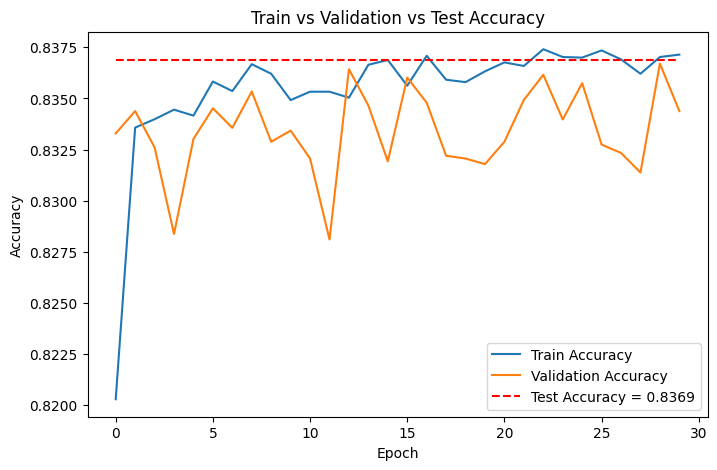

In [37]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.hlines(test_acc, xmin=0, xmax=len(history.epoch)-1, colors='r', linestyles='dashed', label=f'Test Accuracy = {test_acc:.4f}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation vs Test Accuracy')
plt.legend()

- without early stopping, trainig takes longer time(more epochs).

- without early stopping, the accuracy is slightky higher.

- how early stopping helps prevent overfitting: Stops training when validation accuracy stops improving (to avoid memorizing noise) and restores the best weights found.

## Part 5: Reflection
1. Summarize what you learned about:
   - The role of optimizers
   - The effect of batch size
   - Regularization methods
   - Early stopping
   - Train/validation/test splits
2. If you had to train a deep learning model on a new tabular dataset, what choices would you make for:
   - Optimizer
   - Batch size
   - Regularization
   - Early stopping
   - Data splitting strategy  
   and why?

- Optimizers: Control weight updates.

- Adam is a good default for its adaptive, fast convergence.

- Batch Size: Smaller sizes offer a good trade-off between training stability and generalization.

- Regularization: L2 and Dropout prevent overfitting by constraining the model.

- Early stopping: stops the training when validation performance plateaus to keep the best model.

- train: model fitting. val: for hyperparameter tuning. test:final evaluation.

- If i had to train a deep learning model on a new tabular dataset:

1. optimizer: Adam

2. Batch Size: 32 or 64 (not very big and not too small)

3. Regularization: l2 or Dropout (i'll try and use the best one for my model)

4. Early Stopping: i'll use it to avoid overfitting(patience: 5-10)

5. Data Split: train:70, val:15, test:15 to perform hyperparameter tuning on val set to avoid data leakage
